# Corpus and WordNet

In this part of the study we will cover the following:
- introduction to various useful textual corpora available with NLTK
- accessing in-built corpora from Python
- working with frequency distributions
- introduction to WordNet and its lexical features

# 1. Accessing in-built corpora

Four this exercise we will take a look into one of the in-built corpus from NLTK namely reuters corpus.

In [2]:
# import required libraries
from nltk.corpus import reuters

In [5]:
# download reuters package
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/dacy/nltk_data...


True

In [7]:
# next, we want to check what exactly is available in this corpus
files = reuters.fileids()
files[:20]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863']

We can see that reuters corpus consist of train and test data which are lists of files and the relative paths of each of them in the reuters corpus.

In [8]:
# next, we access te actual content on any of these files e.g test/16097
# to do this we use words() function on the corpus object 
words16097 = reuters.words(['test/16097'])

In [9]:
# print the first entries
words16097[:7]

['UGANDA', 'PULLS', 'OUT', 'OF', 'COFFEE', 'MARKET', '-']

In [11]:
# next, to access a specific number of words(20) from the same file
words20 = reuters.words(['test/16097'])[:20]
words20

['UGANDA',
 'PULLS',
 'OUT',
 'OF',
 'COFFEE',
 'MARKET',
 '-',
 'TRADE',
 'SOURCES',
 'Uganda',
 "'",
 's',
 'Coffee',
 'Marketing',
 'Board',
 '(',
 'CMB',
 ')',
 'has',
 'stopped']

The reuters corpus is not just a list but also hierarhically categorized into 90 topics where each topic has many files associated with it. 

Therefore, when accessing one of these topics, we are actually accessing all of the files associated with that topic.

In [12]:
# check the list of topics
reutersGenres = reuters.categories()
reutersGenres

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

As we can see, when printing the list of all topics available we'll have displayed 90 categories.

In [21]:
# access 'bop', 'cocoa' categories and print all words from these 2 categories.
# if we encounter '.' we insert a new line

#for w in reuters.words(categories=['bop', 'cocoa']):
#    print(w+' ', end='')
#    if (w is '.'):
#        print()

# 2. Download an external corpus, load it and access it

In this part we will make use of an external corpus namely Cornell CS Movie review corpus which is already labelled for positive and negative reviews and used for training sentiment analysis modules.

To download the dataset we'll navigate to the following url: http://www.cs.cornell.edu/peop/pabo/movie%2Dreview%2Ddata/. 

Since the corpus we have downloaded is already categorized, we will use CategorizedPlaintextCorpusReader from NLTK library to read and load the given corpus.

In [22]:
# import required libraries
from nltk.corpus import CategorizedPlaintextCorpusReader

In [23]:
# read Cornel CS Movie corpus
reader = CategorizedPlaintextCorpusReader(r'./data/datasets/mix20_rand700_tokens_0211/tokens', 
                                          r'.*\.txt', 
                                          cat_pattern=r'(\w+)/*')

In [24]:
# print categories
reader.categories()

['neg', 'pos']

In [26]:
# check what is available in the corpus
reader.fileids()[:20]

['neg/cv000_tok-9611.txt',
 'neg/cv001_tok-19324.txt',
 'neg/cv002_tok-3321.txt',
 'neg/cv003_tok-13044.txt',
 'neg/cv004_tok-25944.txt',
 'neg/cv005_tok-24602.txt',
 'neg/cv006_tok-29539.txt',
 'neg/cv007_tok-11669.txt',
 'neg/cv008_tok-11555.txt',
 'neg/cv009_tok-19587.txt',
 'neg/cv010_tok-2188.txt',
 'neg/cv011_tok-7845.txt',
 'neg/cv012_tok-26965.txt',
 'neg/cv013_tok-14854.txt',
 'neg/cv014_tok-12391.txt',
 'neg/cv015_tok-23730.txt',
 'neg/cv016_tok-16970.txt',
 'neg/cv017_tok-27221.txt',
 'neg/cv017_tok-29801.txt',
 'neg/cv018_tok-11502.txt']

In [29]:
# create a list that contains samples of both categories 'pos' and 'neg' respectively
posFiles = reader.fileids(categories='pos')
negFiles = reader.fileids(categories='neg')

In [30]:
# select a file randomly from each of the lists of posFiles and negFiles
from random import randint
fileP = posFiles[randint(0, len(posFiles)-1)]
fileN = negFiles[randint(0, len(negFiles)-1)]

In [32]:
# print random file name of each positive and negative
print(fileP)
print(fileN)

pos/cv401_tok-11239.txt
neg/cv217_tok-29465.txt


In [33]:
# access data and print in the console sentence by sentence for each file
for w in reader.words(fileP):
    print(w+' ', end='')
    if (w is '.'):
        print()
for w in reader.words(fileN):
    print(w+' ', end='')
    if (w is '.'):
        print()

written by larry ferguson . 
directed by ringo lam . 
starring jean - claude van damme and natasha henstridge . 
rated r ( contains violence , nudity , and profanity ) 101 mins . 
synopsis : alain , a cop from " south of france , " encounters the corpse of his unknown twin brother , assumes his identity , travels to the usa , and meets an annoying cabbie , the russian mafia , crooked fbi agents , and his brother ' s former lover , alex . 
after surviving car chases , street fights , and near - deaths due to fires , alain becomes nervous when he must introduce alex to his mother . 
comments : maximum risk ' s opening informs the audience that the scene takes place " south of france . 
" the scene actually takes place in france , the audience finds out , and i ' d imagine the filmmakers probably meant " southern france . 
" why mention this ? because i wanted to point out that one can ' t apply logic to maximum risk and expect it to work . 
in fact , logic immediately falls apart in this

# 3. Counting all wh words in three different genres in the Brown corpus

In this part we will use FreqDist class from nltk library to count all the words on any given corpus. For this exercise we will make use of Brown corpus.

In [34]:
# import required libraries
import nltk
from nltk.corpus import brown

In [35]:
# check all genres and pick three categories from them
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [36]:
# pick three categories from brown corpus and whwords
genres = ['fiction', 'humor', 'romance']
whwords = ['what', 'which', 'how', 'why', 'when', 'where', 'who']

In [48]:
# since we have the 'genres' and the words we want to count in lists for this we will use extensively for loop
# to iterate over them and optimize the number of lines of code
for i in range(0, len(genres)):
    genre = genres[i]
    print()
    print("Analyzing '" + genre + "' wh words")
    genre_text = brown.words(categories=genre)
    # create FreqDist object
    fdist = nltk.FreqDist(genre_text)
    for wh in whwords:
        print(wh + ':', fdist[wh], end=' ')


Analyzing 'fiction' wh words
what: 128 which: 123 how: 54 why: 18 when: 133 where: 76 who: 103 
Analyzing 'humor' wh words
what: 36 which: 62 how: 18 why: 9 when: 52 where: 15 who: 48 
Analyzing 'romance' wh words
what: 121 which: 104 how: 60 why: 34 when: 126 where: 54 who: 89 

We can clearly see that we have the word count for all seven wh words for the three picked genres. By counting the population of wh words, we can understand if the given text is high on relative clauses or question sentences. However, we can do the count on any word we want to understand the relevance of the given text.

# 4. Explore frequency distribution operations on one of the web and chat text corpus files

In this exercise, we will perfom frequency distribution on the personal web advertising wich is provided by NLTK library, nltk.corpus.webtext. 

We will explore various functionalities of the nltk.FreqDist object such as the count of distinct words, 10 most common words, maximum-frequency words, frequency distribution plot and tabulation.

In [49]:
# import required libraries
import nltk
from nltk.corpus import webtext

In [50]:
# print webtext files
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [51]:
# next, select the file that contains personal advertisement data and run frequency distribution on it
file_id = 'singles.txt'
wbt_words = webtext.words(file_id)
fdist = nltk.FreqDist(wbt_words)

In [52]:
# check maximum frequency distribution
print('Count of the maximum appearing token "', fdist.max(), '" : ', fdist[fdist.max()])

Count of the maximum appearing token " , " :  539


In [55]:
# count of distinct words in the bag of our frequency distribution using fdist.N() function
print('Total Number of distinct tokens in the bag: ', fdist.N())

Total Number of distinct tokens in the bag:  4867


In [58]:
# check the 10 most common words in the selected corpus bag
print('Following are the most common 10 words in the bag')
print(fdist.most_common(10))

Following are the most common 10 words in the bag
[(',', 539), ('.', 353), ('/', 110), ('for', 99), ('and', 74), ('to', 74), ('lady', 68), ('-', 66), ('seeks', 60), ('a', 52)]


In [59]:
# next, tabulate the entire frequency distribution using fdist.tabulate()
print('Frequency Distribution on Personal Advertisements')
print(fdist.tabulate())

Frequency Distribution on Personal Advertisements
             ,              .              /            for            and             to           lady              -          seeks              a           with              S           ship              &   relationship            fun             in           slim          build              o              s              y         smoker             50            non              I         movies           good         honest         dining            out          rship        looking           like            age     attractive            who     friendship             40             45             35        Looking              5           MALE          times           male           meet           life        seeking              r           open            the         female             of           GSOH          enjoy             ''            fit             or           LADY            guy             no             be      

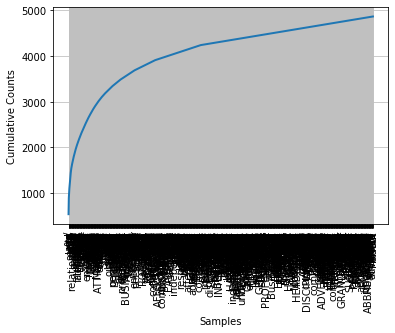

In [61]:
# next, plot the graph of frequency distribution with cumulative frequencies using fdist.plot()
fdist.plot(cumulative=True)

Looking at the frequency distribution plot we can see that most of it does not make any sense. The maximum appearing token count has been generated by comma (',') while when we looked at the top 10 most common tokens we could not make out much about the target dataset.

The reason is that we have not applied any preprocessing step (e.g. removal of english stop words) and so on. We will start exploring this in detail in the following chapters.

# 5. Taking an ambiguous word and explore all its senses using WordNet

In this part we will explore what word sense is. The objective here is to choose a word and explore its various senses as understood by WordNet.

In [1]:
# import required libraries
from nltk.corpus import wordnet as wn

In [3]:
# take a string english word and assign to a variable
chair = 'chair'

In [9]:
# access WordNet API database and fetch all senses associated with the word 'chair'.
chair_synsets = wn.synsets(chair)

# the following outputs a list of all chair senses
print('Synsets/Senses of chair: ', chair_synsets, '\n')

Synsets/Senses of chair:  [Synset('chair.n.01'), Synset('professorship.n.01'), Synset('president.n.04'), Synset('electric_chair.n.01'), Synset('chair.n.05'), Synset('chair.v.01'), Synset('moderate.v.01')] 



In [11]:
# next, we iterate over te list of synsets and perform certain operations
for synset in chair_synsets:
    print(synset, ': ')
    print('Definition: ', synset.definition())
    print('Lemmas/Synonymous words: ', synset.lemma_names())
    print('Example: ', synset.examples(), '\n')

Synset('chair.n.01') : 
Definition:  a seat for one person, with a support for the back
Lemmas/Synonymous words:  ['chair']
Example:  ['he put his coat over the back of the chair and sat down'] 

Synset('professorship.n.01') : 
Definition:  the position of professor
Lemmas/Synonymous words:  ['professorship', 'chair']
Example:  ['he was awarded an endowed chair in economics'] 

Synset('president.n.04') : 
Definition:  the officer who presides at the meetings of an organization
Lemmas/Synonymous words:  ['president', 'chairman', 'chairwoman', 'chair', 'chairperson']
Example:  ['address your remarks to the chairperson'] 

Synset('electric_chair.n.01') : 
Definition:  an instrument of execution by electrocution; resembles an ordinary seat for one person
Lemmas/Synonymous words:  ['electric_chair', 'chair', 'death_chair', 'hot_seat']
Example:  ['the murderer was sentenced to die in the chair'] 

Synset('chair.n.05') : 
Definition:  a particular seat in an orchestra
Lemmas/Synonymous words:

In [12]:
bat = 'bat'

In [15]:
bat_synsets = wn.synsets(bat)

In [17]:
for synset in bat_synsets:
    print(synset, ':')
    print('Definition: ', synset.definition())
    print('Lemma/Synonymous words: ', synset.lemma_names())
    print('Example: ', synset.examples(), '\n')

Synset('bat.n.01') :
Definition:  nocturnal mouselike mammal with forelimbs modified to form membranous wings and anatomical adaptations for echolocation by which they navigate
Lemma/Synonymous words:  ['bat', 'chiropteran']
Example:  [] 

Synset('bat.n.02') :
Definition:  (baseball) a turn trying to get a hit
Lemma/Synonymous words:  ['bat', 'at-bat']
Example:  ['he was at bat when it happened', 'he got four hits in four at-bats'] 

Synset('squash_racket.n.01') :
Definition:  a small racket with a long handle used for playing squash
Lemma/Synonymous words:  ['squash_racket', 'squash_racquet', 'bat']
Example:  [] 

Synset('cricket_bat.n.01') :
Definition:  the club used in playing cricket
Lemma/Synonymous words:  ['cricket_bat', 'bat']
Example:  ['a cricket bat has a narrow handle and a broad flat end for hitting'] 

Synset('bat.n.05') :
Definition:  a club used for hitting a ball in various games
Lemma/Synonymous words:  ['bat']
Example:  [] 

Synset('bat.v.01') :
Definition:  strike 